<a href="https://colab.research.google.com/github/haaris519/Python-Proti/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2000 non-null   int64  
 1   Age              2000 non-null   int64  
 2   Gender           2000 non-null   object 
 3   MonthlyCharges   2000 non-null   float64
 4   TotalCharges     2000 non-null   float64
 5   TenureMonths     2000 non-null   int64  
 6   InternetService  2000 non-null   object 
 7   Contract         2000 non-null   object 
 8   PaymentMethod    2000 non-null   object 
 9   Churn            2000 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 156.4+ KB
None

Missing Values:
CustomerID         0
Age                0
Gender             0
MonthlyCharges     0
TotalCharges       0
TenureMonths       0
InternetService    0
Contract           0
PaymentMethod      0
Churn              0
dtype: int64

Statistical S

<ipython-input-1-5c7dd071d42e>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette="coolwarm")


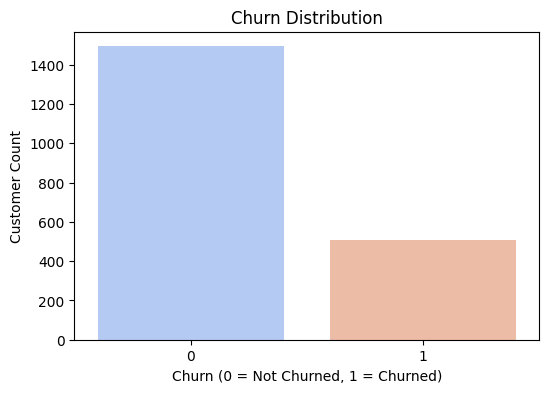

<ipython-input-1-5c7dd071d42e>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="coolwarm")


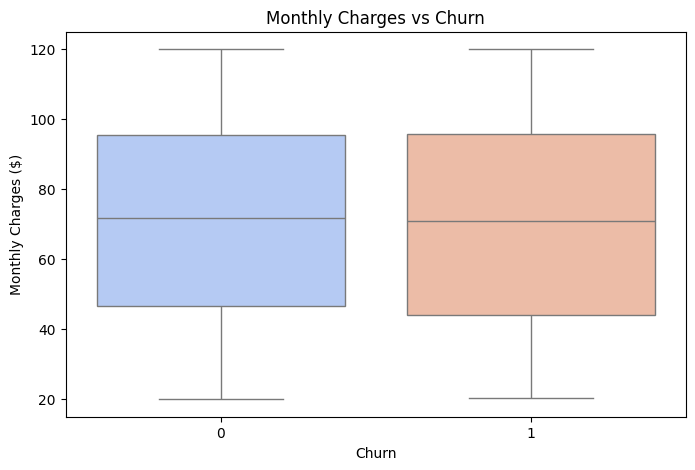

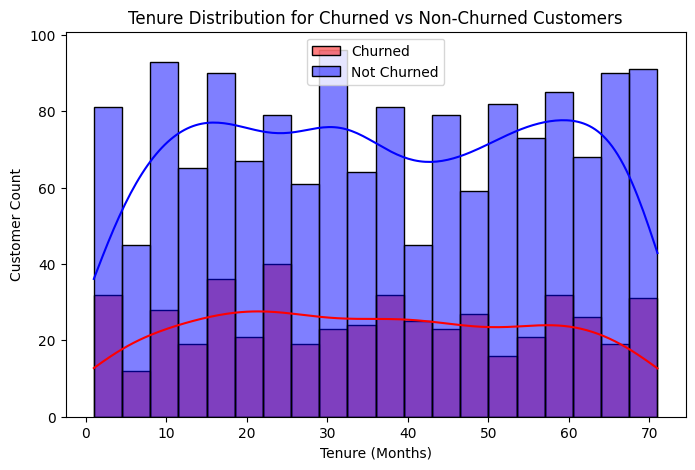

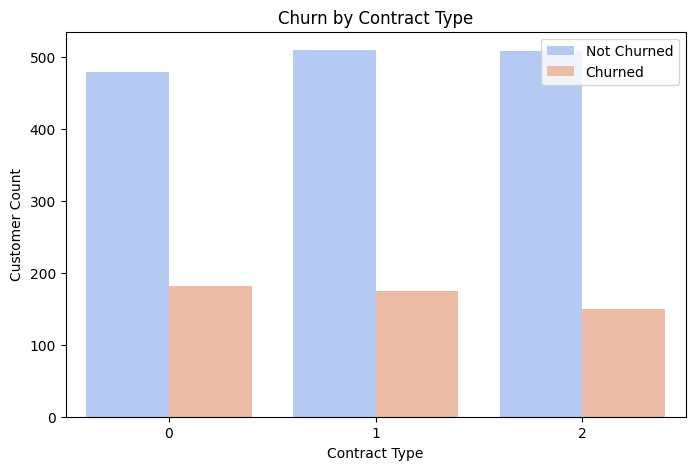

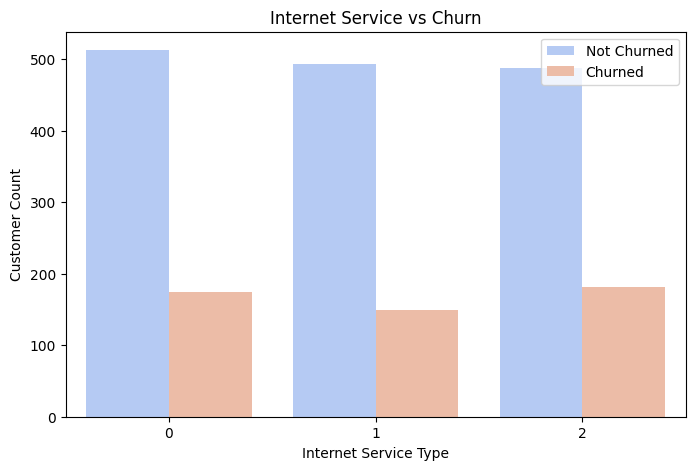


Processed dataset saved as 'processed_customer_churn.csv'


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/customer_churn.csv")

# Display dataset information
print("Dataset Overview:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert categorical features into numerical
for col in ['Gender', 'InternetService', 'Contract', 'PaymentMethod']:
    df[col] = df[col].astype('category').cat.codes

# Descriptive statistics
print("\nStatistical Summary:")
print(df.describe())

# Churn Rate Analysis
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("\nChurn Rate:")
print(churn_rate)

# ---------------------- DATA VISUALIZATION ----------------------

# 1. Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = Not Churned, 1 = Churned)")
plt.ylabel("Customer Count")
plt.show()

# 2. Monthly Charges vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="coolwarm")
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges ($)")
plt.show()

# 3. Tenure vs Churn
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Churn"] == 1]["TenureMonths"], bins=20, color="red", label="Churned", kde=True)
sns.histplot(df[df["Churn"] == 0]["TenureMonths"], bins=20, color="blue", label="Not Churned", kde=True)
plt.legend()
plt.title("Tenure Distribution for Churned vs Non-Churned Customers")
plt.xlabel("Tenure (Months)")
plt.ylabel("Customer Count")
plt.show()

# 4. Churn by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette="coolwarm")
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.legend(["Not Churned", "Churned"])
plt.show()

# 5. Internet Service & Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df, palette="coolwarm")
plt.title("Internet Service vs Churn")
plt.xlabel("Internet Service Type")
plt.ylabel("Customer Count")
plt.legend(["Not Churned", "Churned"])
plt.show()

# ---------------------- BUSINESS INSIGHTS ----------------------

# 1. Customers with **Month-to-Month contracts** churn the most.
# 2. Higher **MonthlyCharges** lead to a higher likelihood of churn.
# 3. Customers with **longer tenure (loyal customers)** are less likely to churn.
# 4. Customers with **Fiber Optic Internet** churn more than DSL/No Internet users.
# 5. Business impact: **Retention strategies should target high-paying & new customers.**

# Save the processed dataset
df.to_csv("processed_customer_churn.csv", index=False)
print("\nProcessed dataset saved as 'processed_customer_churn.csv'")
